In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.sample(1)

,total_bill,tip,sex,smoker,day,time,size
58,11.24,1.76,Male,Yes,Sat,Dinner,2


In [6]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
189,23.10,4.00,Male,Yes,Sun,Dinner,3
47,32.40,6.00,Male,No,Sun,Dinner,4
49,18.04,3.00,Male,No,Sun,Dinner,2
41,17.46,2.54,Male,No,Sun,Dinner,2
32,15.06,3.00,Female,No,Sat,Dinner,2


In [7]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
35,24.06,3.6,Male,No,Sat,Dinner,3


In [8]:
tips.groupby('day').count()

C:\Users\Amir\AppData\Local\Temp\ipykernel_9520\3706922387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day').count()


,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [11]:
tips.groupby('day')['tip'].sum()

C:\Users\Amir\AppData\Local\Temp\ipykernel_9520\3899483265.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip'].sum()


day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [12]:
df2 = tips[tips.columns]

In [13]:
df2.drop('size', inplace=True, axis=1)

In [14]:
df2['percent'] = df2['tip'] / df2['total_bill'] * 100

In [15]:
df2['percent']

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: percent, Length: 244, dtype: float64

In [18]:
df2['percent'].sort_values()

237     3.563814
102     5.643341
57      5.679667
0       5.944673
187     6.565988
         ...    
183    28.053517
232    29.198966
67     32.573290
178    41.666667
172    71.034483
Name: percent, Length: 244, dtype: float64

In [19]:
df2.iloc[172]

total_bill         7.25
tip                5.15
sex                Male
smoker              Yes
day                 Sun
time             Dinner
percent       71.034483
Name: 172, dtype: object

In [26]:
# df2.groupby('smoker').sum()

In [32]:
tips.groupby(['day', 'size'])

C:\Users\Amir\AppData\Local\Temp\ipykernel_9520\4068334650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['day', 'size'])


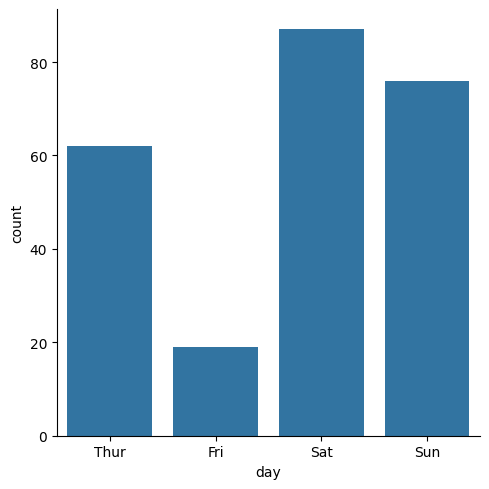

In [33]:
sns.catplot(
    data=tips,
    x='day',
    kind='count'
)

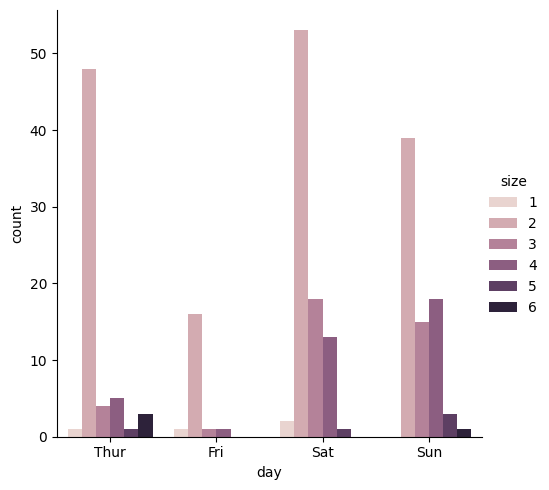

In [35]:
sns.catplot(
    data=tips,
    x='day',
    hue='size',
    kind='count',
)

In [37]:
tips.replace(
    {
        'sex': {'Male': 0, 'Female': 1},
        'smoker': {'No': 0, 'Yes': 1},
    },
    inplace=True
)

In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [39]:
days = pd.get_dummies(tips['day'])
days

,Thur,Fri,Sat,Sun
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
239,False,False,True,False
240,False,False,True,False
241,False,False,True,False
242,False,False,True,False


In [40]:
tips = pd.concat([tips, days], axis=1)
tips

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,1,0,Sun,Dinner,2,False,False,False,True
1,10.34,1.66,0,0,Sun,Dinner,3,False,False,False,True
2,21.01,3.50,0,0,Sun,Dinner,3,False,False,False,True
3,23.68,3.31,0,0,Sun,Dinner,2,False,False,False,True
4,24.59,3.61,1,0,Sun,Dinner,4,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,False,False,True,False
240,27.18,2.00,1,1,Sat,Dinner,2,False,False,True,False
241,22.67,2.00,0,1,Sat,Dinner,2,False,False,True,False
242,17.82,1.75,0,0,Sat,Dinner,2,False,False,True,False


In [41]:
times = pd.get_dummies(tips['time'])
times

,Lunch,Dinner
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
239,False,True
240,False,True
241,False,True
242,False,True


In [42]:
tips = pd.concat([tips, times], axis=1)
tips

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,False,False,False,True,False,True
1,10.34,1.66,0,0,Sun,Dinner,3,False,False,False,True,False,True
2,21.01,3.50,0,0,Sun,Dinner,3,False,False,False,True,False,True
3,23.68,3.31,0,0,Sun,Dinner,2,False,False,False,True,False,True
4,24.59,3.61,1,0,Sun,Dinner,4,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,False,False,True,False,False,True
240,27.18,2.00,1,1,Sat,Dinner,2,False,False,True,False,False,True
241,22.67,2.00,0,1,Sat,Dinner,2,False,False,True,False,False,True
242,17.82,1.75,0,0,Sat,Dinner,2,False,False,True,False,False,True


In [49]:
X = tips[['sex', 'smoker', 'size', 'Fri', 'Sat', 'Sun', 'Dinner']]
y = tips[['tip']]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn import metrics

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=2354)

In [51]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
predictions = regressor.predict(X_test)

In [53]:
import seaborn as sns

<Axes: ylabel='Count'>

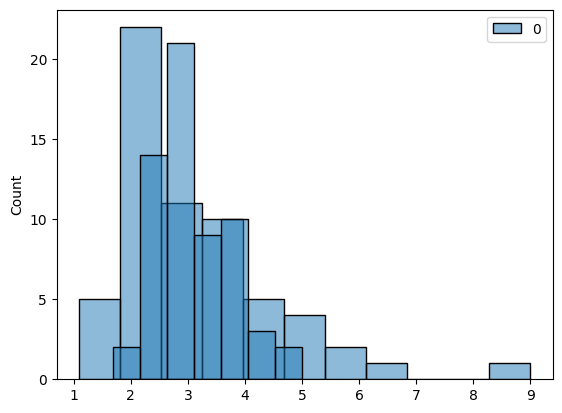

In [55]:
sns.histplot(y_test)
sns.histplot(predictions)

<Axes: ylabel='Count'>

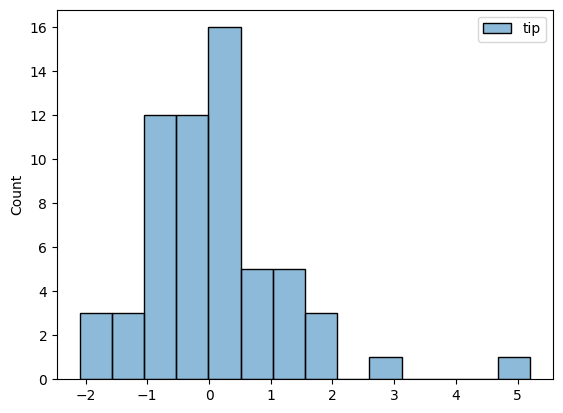

In [56]:
sns.histplot(y_test - predictions)

In [61]:
print(
    metrics.mean_absolute_error(y_test, predictions)
)
print(
    metrics.mean_squared_error(y_test, predictions)
)
print(
    metrics.mean_squared_error(y_test, predictions)
)
print(
    np.sqrt(
        metrics.mean_squared_error(y_test, predictions)
    )
)

0.8124951638612571
1.3328729844987268
1.3328729844987268
1.1545011842777497


In [62]:
new_customer = np.array([1,0,6,0,0,1,1]).reshape(1, -1)

In [63]:
regressor.predict(new_customer)

d:\dev\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.16097019]])